In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Training Dataframe Exploratory Analysis

In [80]:
## Here I am importing the training dataframe and printing out a few valuable
## characteristics to take note of
train_df = pd.read_csv('/Users/TerryONeill/west_nile/west_nile/assets/train.csv')
print 'size of dataframe:\n', train_df.shape
print
print 'datatypes:\n', train_df.dtypes
print
print 'null values:\n', train_df.isnull().sum()  ## no null values

size of dataframe:
(10506, 12)

datatypes:
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

null values:
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


In [81]:
## Next we will take a look at the head to get familiar with the dataframe
train_df.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [82]:
## checking to see how many traps there were from unique values in that column
train_df.Trap.nunique()

## this tells us there are 136 traps total collecting mosquitoes

136

In [83]:
## checking to see how many positive west nile occurences there were (1 means positive)

train_df.WnvPresent.value_counts()

## so we have about 10,000 cases with no west nile and about 550 with west nile

0    9955
1     551
Name: WnvPresent, dtype: int64

In [84]:
## just getting an idea of how many values are in this column and how spread out they are
train_df.AddressAccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

In [85]:
## checking the distinct number of number of mosquitoes caught there were throughout the
## process

train_df.NumMosquitos.nunique()

## they cap the number caught per observation at 50 so this tells me there was at least
## 1 test with any number 1-50 of mosquitoes caught

50

In [86]:
## checking to see the number of mosquitoes that were caught and tested over the course
## of this project

np.sum(train_df.NumMosquitos)

135039

In [87]:
## this process took place over 95 distinct days. This doesnt mean 95 days in a row,
## just that it was limited to 95 separate days in total
train_df.Date.nunique()

95

In [88]:
## i am going to change the date column to datetime

from datetime import datetime
from datetime import timedelta

train_df.sort_values('Date', inplace = True)
train_df.set_index('Date', inplace = True)

In [89]:
train_df.index = train_df.index.to_datetime()

In [98]:
train_df['2013']

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
2013-06-07,"9100 West Higgins Road, Rosemont, IL 60018, USA",CULEX RESTUANS,91,W HIGGINS RD,T009,"9100 W HIGGINS RD, Chicago, IL",41.992478,-87.862995,8,11,0
2013-06-07,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,4,0
2013-06-07,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,17,0
2013-06-07,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,19,0
2013-06-07,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,4,0
2013-06-07,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,3,0
2013-06-07,"9100 West Higgins Road, Rosemont, IL 60018, USA",CULEX PIPIENS/RESTUANS,91,W HIGGINS RD,T009,"9100 W HIGGINS RD, Chicago, IL",41.992478,-87.862995,8,5,0
2013-06-07,"South Brandon Avenue, Chicago, IL 60617, USA",CULEX RESTUANS,13,S BRANDON,T209,"1300 S BRANDON, Chicago, IL",41.740641,-87.546587,5,4,0
2013-06-07,"South Cottage Grove Avenue, Chicago, IL, USA",CULEX RESTUANS,10,S COTTAGE GROVE,T102,"1000 S COTTAGE GROVE, Chicago, IL",41.750498,-87.605294,5,4,0
2013-06-07,"8900 South Muskegon Avenue, Chicago, IL 60617,...",CULEX RESTUANS,89,S MUSKEGON AVE,T099,"8900 S MUSKEGON AVE, Chicago, IL",41.733643,-87.555510,8,1,0


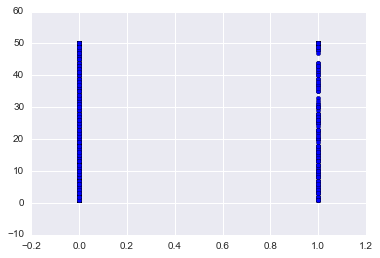

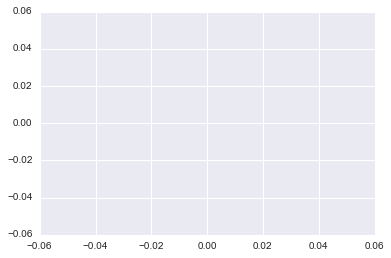

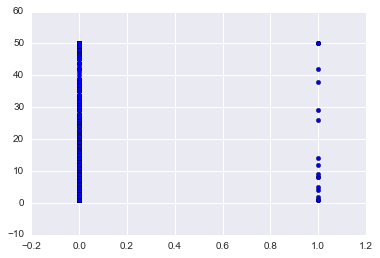

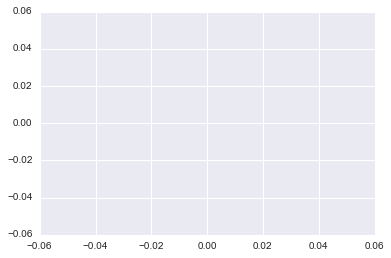

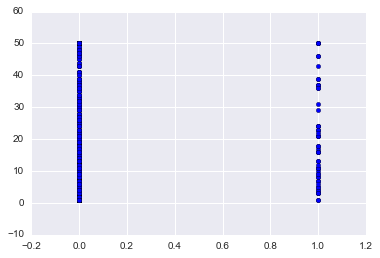

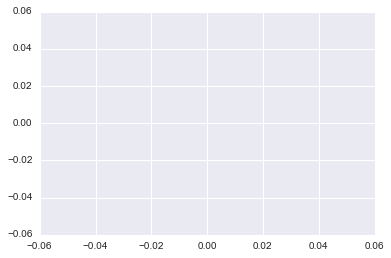

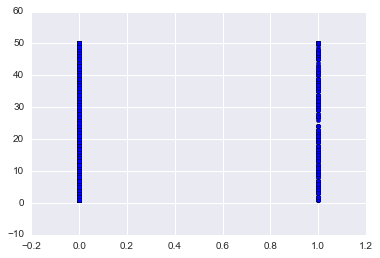

In [91]:
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013']

for i in years:
    plt.scatter(train_df[i]['WnvPresent'], train_df[i]['NumMosquitos'])
    plt.show()

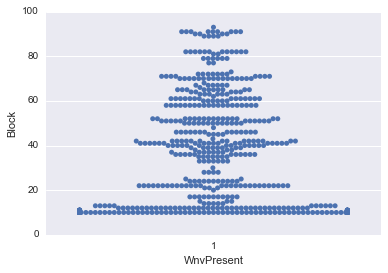

In [92]:
## the following is a plot of the frequency of occurence of a positive westnile virus
## mosquitoe ordered by block in the city

sns.swarmplot(train_df.WnvPresent[train_df['WnvPresent'] == 1], train_df.Block[train_df['WnvPresent'] == 1])

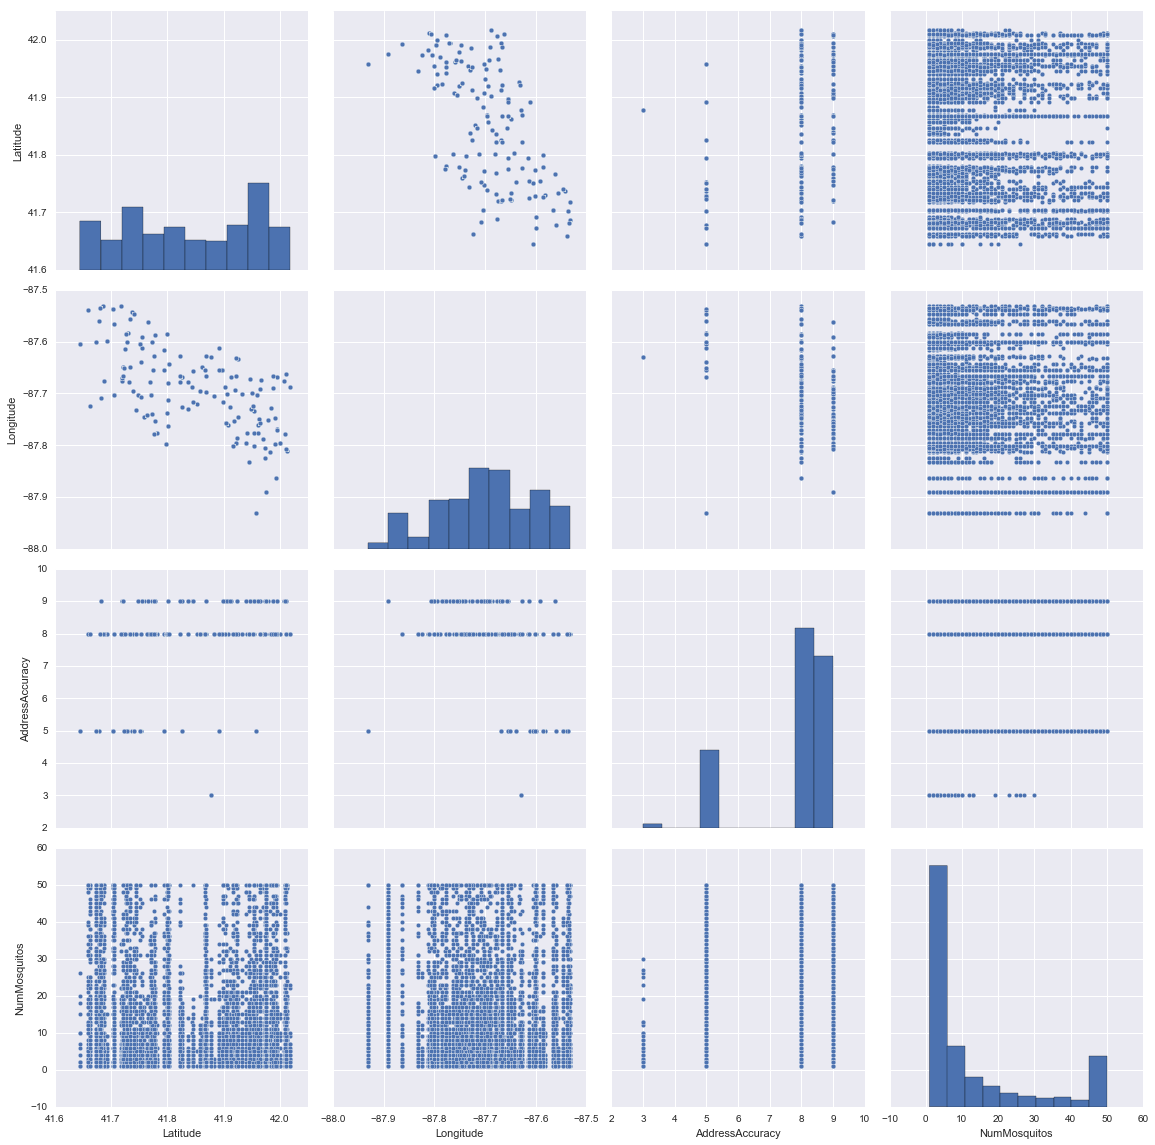

In [93]:
cols_plot = ['Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos']

sns.pairplot(train_df[cols_plot], size = 4)

In [94]:
## I AM NOW CREATING NEW DATAFRAME FOR ONLY POSITIVE WEST NILE MOSQUITOES

wn_pos = train_df[train_df.WnvPresent == 1]
print wn_pos.shape

(551, 11)


In [95]:
sns.pairplot

<function seaborn.linearmodels.pairplot>

In [96]:
## I am creating the engine that connects psql with my newly created database (west_nile)
## so that i can export the dataframes as tables

from sqlalchemy import create_engine
import psycopg2

engine = create_engine('postgresql://TerryONeill@localhost:5432/west_nile')

In [97]:
## this is adding the dataframe to my newly created database in psql as
## a table named 'whatever the first parameter is'
train_df.to_sql('training_data', engine)

## an error might get kicked up here since a table has already been created, that 
## is fine for us, just ignore the error. If you alter the dataframe then you need
## to delete the table in psql and then recreate it

ValueError: Table 'training_data' already exists.